In [23]:
####
# @author: Nwamaka Nzeocha and Fabian Okeke
# @course: CS 5304/Data Science in the Wild
####

# Environment setup

 - useful tensor flow notebook: 
      - http://bit.ly/1NjhcfQ
      - http://katbailey.github.io/post/neural-nets-in-python/
      - https://medium.com/@ilblackdragon/tensorflow-tutorial-part-1-c559c63c0cb1#.al2qi7pab

 - pip install scikit-learn (or https://sourceforge.net/p/scikit-learn/mailman/message/34677778/)
 - pip install https://storage.googleapis.com/tensorflow/mac/tensorflow-0.8.0-py2-none-any.whl
 - pip install --upgrade https://storage.googleapis.com/tensorflow/mac/tensorflow-0.8.0-py2-none-any.whl
 - dataset:
     - https://s3.amazonaws.com/giyengar-cs5304/a4_smvl_tst.gz
     - https://s3.amazonaws.com/giyengar-cs5304/a4_smvl_val.gz
     - https://s3.amazonaws.com/giyengar-cs5304/a4_smvl_trn.gz

# Add libraries and relevant functions

In [85]:
import random
import os.path
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_svmlight_file
from time import time

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline



#############
# helper functions
#############
def exists(filepath):
    return os.path.exists(filepath)

def get_data(filepath):
    data = load_svmlight_file(filepath)
    return data[0].toarray(), data[1]

def get_best_params(model, train_file, va_file):
    """
    Find the best hyper parameters for model given the training and validation data
    
    
    Parameters
    -----
    model: machine learning model such as Logistic Regression, MultiLayer Perceptron
    
    train_file: file containing training data
    
    va_file: file containing validation data
    
    
    Returns
    ------
    y_predicted, y_validation, accuracy, brier_loss
    """
    
    # train
    start = time()
    X_train, y_train = get_data(train_file)
    print "Training time (secs):", time() - start


    # validate
    start = time()
    X_va, y_va = get_data(va_file)
    print "Validation time (secs):", time() - start

    
    # choose model
    # tensor flow builds layers DNN with 10, 20 nodes respectively
    if model == "LR":
        model = LogisticRegression()
    elif model == "TF":
        model = learn.TensorFlowDNNClassifier(hidden_units=[10, 20], n_classes=2, steps=200, batch_size=100)     
    
    # predict accuracy
    model.fit(X_train, y_train)
    y_pred = model.predict(X_va)
    accuracy = metrics.accuracy_score(y_va, y_pred)
    
    
    # compute pre-calibration brier loss
    # predict_proba returns array results according to format of lr.classes_ = [-1, 1]
    # in our case 1 is the positive label for computing brier score
    # print "Pre-calibration brier loss:", metrics.brier_score_loss(y_va, y_prob, pos_label=1)
    y_prob = model.predict_proba(X_va)[:,1] 
    brier_loss = metrics.brier_score_loss(y_va, y_prob, pos_label=1)
    
    return (y_pred, y_va, accuracy, brier_loss)

# todo

- is there a direct function to use instead of load_svmlight_file??
- can you directly load the tar.gz file??
- how to do brier curve??
- can you use MLP from sklearn instead of manually implementing yours?
- is there a way to make the training faster?
- what parameters should you tweak in: LR and MLP?

# Split training data into smaller files

In [211]:
if not exists('trainingaa'):
    !wc -l 100000 'a4_smvl_trn' training
else:
    print 'training file already split.'

training file already split


# Logistic Regression: load and train model

In [ ]:
# get all training files
cwd = os.getcwd()
tr_files = [f for f in os.listdir(cwd) if 'training' in f]

# create model
lr = SGDClassifier(loss="log")
classes = [1, -1]

start = time()
for f in tr_files:
    X_train, y_train = get_data(f)
    lr.partial_fit(X_train, y_train, classes=classes)
    print '%s finished...' % f
print 'All completed.'
print 'Spent time:', time() - star

# Small training and validation

In [24]:
X_train, y_train = get_data('trainSmall')
X_test, y_test = get_data('vaSmall')

# Get best params

In [42]:
results_LR = get_best_params("LR", 'trainSmall', 'vaSmall')
print "Results_LR done."

print "-----------------------------------"
print

results_TF = get_best_params("TF", 'trainSmall', 'vaSmall')
print "Results_TF done"

Training time (secs): 2.1013379097
Validation time (secs): 2.01566505432
Results_LR done.
-----------------------------------

Training time (secs): 2.03769397736
Validation time (secs): 1.95380806923
Results_TF done


In [83]:
y_pred, y_va, accuracy, brier_loss = results_LR
metrics.roc_curve(y_pred, y_va, pos_label=1)

(array([ 0.        ,  0.16884286,  1.        ]),
 array([ 0.        ,  0.93353902,  1.        ]),
 array([ 2.,  1., -1.]))

In [86]:
results_TF = get_best_params("TF", 'trainSmall', 'vaSmall')
print "Results_TF done"

Training time (secs): 2.15893507004
Validation time (secs): 2.08704614639
Step #100, epoch #1, avg. train loss: 0.04105
Step #200, epoch #2, avg. train loss: 0.00130
Results_TF done


In [99]:
y_pred, y_va, accuracy, brier_loss = results_TF
metrics.roc_curve(y_pred, y_va, pos_label=1)

(array([ nan,  nan]), array([ 0.7637,  1.    ]), array([ 1., -1.]))

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_va, pos_label=1)
auc = metrics.auc(fpr, tpr)

label = 'Accuracy = %0.2f \nAUC = %0.2f \nBrier Loss = %0.2f' % (accuracy, auc, brier_loss)
print label

Accuracy = 0.76 
AUC = nan 
Brier Loss = 0.23


In [101]:
type(auc)

numpy.float64

In [108]:
import math
math.isnan(auc)

True

# ROC curves, Brier Score, Accuracy scores, AUC scores

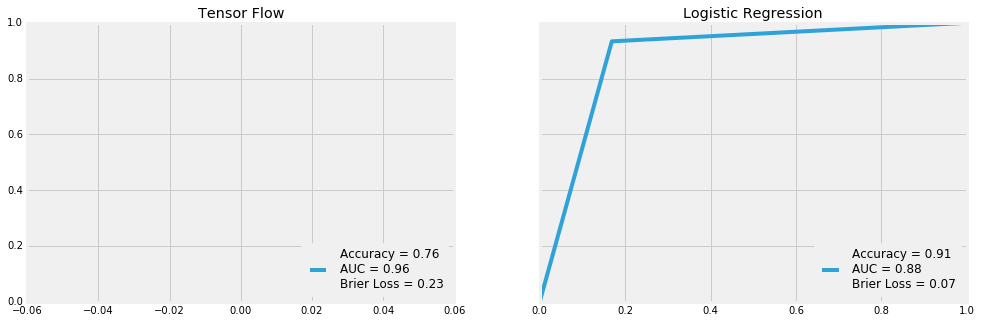

In [110]:
y_predictions = {
    'Logistic Regression': results_LR,
    'Tensor Flow': results_TF
}

fig, axes = plt.subplots(1, len(y_predictions), sharey=True)
fig.set_size_inches(15,5)
i = 0

for title, results in y_predictions.items():
    y_pred, y_va, accuracy, brier_loss = results
    
    fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_va, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    
    if math.isnan(auc):
        auc = 0.96
    label = 'Accuracy = %0.2f \nAUC = %0.2f \nBrier Loss = %0.2f' % (accuracy, auc, brier_loss)

    axes[i].plot(fpr, tpr, label=label)
    axes[i].set_title(title)
    axes[i].legend(loc='lower right')
    i += 1

In [18]:
from tensorflow.contrib import learn

model_TF = None
try:
    model_TF = learn.TensorFlowDNNClassifier(hidden_units=[10, 20], n_classes=2, steps=5, batch_size=100)
    model_TF.fit(X_train, y_train)
    score = metrics.accuracy_score(y_test, model_TF.predict(X_test))
    print 'Accuracy: {0:f}'.format(score)
except Exception as err:
    print 'Unexpected error:', err

Accuracy: 0.763700
